In [48]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from scripts import utils, schemas
from scipy import stats

from urllib.request import urlopen
from PIL import Image # type: ignore
from mplsoccer import PyPizza, add_image, FontManager # type: ignore

pd.set_option('display.max_columns', None)

In [3]:
path = "https://raw.githubusercontent.com/griffisben/Wyscout_Prospect_Research/main/Main%20App/Brasileir%C3%A3o%202024.csv"

In [6]:
data = utils.read_csv2(path)

In [33]:
seasons = pd.DataFrame()

In [34]:
seasons['seasons'] = ["2023", "2024", "2024", "2023", "23-24", "22-23"]

In [8]:
pos = utils.filter_by_position(data, "Kanatlar")

In [17]:
schemas.pos_mapping().values()

dict_values(['Forvet Oyunculariyla', 'Forvet ve Kanat Oyunculariyla', 'OOS ve Kanat Oyunculariyla', 'Kanat Oyunculariyla', 'Orta Saha Oyunculariyla', 'OS & OOS Oyunculariyla', 'DOS & OS Oyunculariyla', 'Bek Oyunculariyla', 'Defansif Oyunculariyla', 'Stoper & DOS Oyunculariyla', 'Santrafor Oyunculariyla', 'Stoper Oyunculariyla'])

In [21]:
selected_position = "Forvetler (OOS, K, SF)"
# Compare selected position with the values in the pos_mapping
for position, schema in schemas.pos_mapping().items():
    if selected_position == position:
        compare_pos = schema
        break
else:
    compare_pos = selected_position  # Handle case where position is not found

In [22]:
compare_pos

'Forvet Oyunculariyla'

In [ ]:
fotmob = soccerdata.FotMob(leagues='INT-European Championship', seasons=2024)

In [ ]:
schedule = fotmob.read_schedule().reset_index()

In [ ]:
topstats = fotmob.read_team_match_stats("Top stats").reset_index()

In [21]:
events = fotmob.read_match_details(schedule)

In [37]:
def process_events(data):
    # Initialize an empty list to collect all match data and match stats
    all_match_data = []
    all_match_stats = []

    for i in data:
        general = i['general']
    # Extract the required match data
        match_data = {
            'matchId': general.get('matchId'),
            'matchName': general.get('matchName'),
            'leagueRoundName': general.get('leagueRoundName'),
            'countryCode': general.get('countryCode'),
            'home_team_name': general['homeTeam'].get('name'),
            'away_team_name': general['awayTeam'].get('name'),
            'home_team_id': general['homeTeam'].get('id'),
            'away_team_id': general['awayTeam'].get('id')
        }
        
        # Append the match data to the list
        all_match_data.append(match_data)

        # Extract the match stats
        if 'shotmap' in i['content']:
            shots = i['content']['shotmap']['shots']
            for shot in shots:
                shot['matchId'] = general.get('matchId')
                shot['teamName'] = general['homeTeam']['name'] if shot['teamId'] == general['homeTeam']['id'] else general['awayTeam']['name']
                all_match_stats.append(shot)
    
    # Convert the lists of match data and match stats to DataFrames
    match_df = pd.DataFrame(all_match_data)
    stats_df = pd.json_normalize(all_match_stats)
    
    return match_df, stats_df

In [38]:
match_df, stats_df = process_events(events)

In [39]:
stats_df

,id,eventType,teamId,playerId,playerName,x,y,min,minAdded,isBlocked,isOnTarget,blockedX,blockedY,goalCrossedY,goalCrossedZ,expectedGoals,expectedGoalsOnTarget,shotType,situation,period,isOwnGoal,isSavedOffLine,isFromInsideBox,firstName,lastName,fullName,teamColor,matchId,teamName,onGoalShot.x,onGoalShot.y,onGoalShot.zoomRatio
0,2696028051,Goal,8570,1152455,Florian Wirtz,87.748529,32.780000,10,NaN,False,True,NaN,NaN,36.973750,0.282526,0.102611,0.3744,RightFoot,RegularPlay,FirstHalf,False,False,False,Florian,Wirtz,Florian Wirtz,#464646,4043837,Germany,0.213294,0.074742,1.000000
1,2696028913,Goal,8570,1156141,Jamal Musiala,93.000000,36.287500,19,NaN,False,True,NaN,NaN,35.982500,2.074000,0.175834,0.3379,RightFoot,RegularPlay,FirstHalf,False,False,True,Jamal,Musiala,Jamal Musiala,#464646,4043837,Germany,0.475529,0.548677,1.000000
2,2696029565,AttemptSaved,8570,749736,Kai Havertz,86.997059,32.398750,28,NaN,False,True,103.672414,33.695000,36.821250,0.488000,0.138585,0.3661,LeftFoot,FreeKick,FirstHalf,False,False,False,Kai,Havertz,Kai Havertz,#464646,4043837,Germany,0.253638,0.129101,1.000000
3,2696030523,AttemptSaved,8570,178818,Ilkay Gündogan,97.763158,31.560000,42,NaN,False,True,103.672414,33.695000,35.601250,0.083474,0.099804,0.1761,Header,RegularPlay,FirstHalf,False,False,True,Ilkay,Gündogan,Ilkay Gündogan,#464646,4043837,Germany,0.576389,0.022083,1.000000
4,2696030659,Goal,8570,749736,Kai Havertz,94.000000,34.000000,45,1.0,False,True,NaN,NaN,35.677500,0.892526,0.788400,0.9606,LeftFoot,Penalty,FirstHalf,False,False,True,Kai,Havertz,Kai Havertz,#464646,4043837,Germany,0.556217,0.236118,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,2699291251,AttemptSaved,8570,276791,Niclas Füllkrug,95.929825,31.255000,117,NaN,False,True,103.862069,34.000000,36.211250,0.976000,0.058766,0.1843,Header,RegularPlay,SecondHalfExtra,False,False,True,Niclas,Füllkrug,Niclas Füllkrug,#464646,4043979,Germany,0.415013,0.258201,1.000000
1226,2699291419,Goal,6720,574645,Mikel Merino,97.666667,34.686250,119,NaN,False,True,NaN,NaN,37.126250,1.181474,0.302742,0.8161,Header,RegularPlay,SecondHalfExtra,False,False,True,Mikel,Merino,Mikel Merino,#c62035,4043979,Spain,0.172950,0.312559,1.000000
1227,2699291569,AttemptSaved,8570,460632,Joshua Kimmich,85.494118,29.043333,120,2.0,True,True,94.096491,30.721250,33.618750,1.220000,0.070082,NaN,RightFoot,RegularPlay,SecondHalfExtra,False,False,False,Joshua,Kimmich,Joshua Kimmich,#464646,4043979,Germany,1.100860,0.322751,1.000000
1228,2699291603,Miss,6720,881771,Ferran Torres,96.894737,23.859108,120,2.0,False,False,102.913793,40.301429,45.612229,0.622842,0.400407,NaN,RightFoot,FastBreak,SecondHalfExtra,False,False,True,Ferran,Torres,Ferran Torres,#c62035,4043979,Spain,0.000000,0.053637,0.325519


In [26]:
pd.json_normalize(events[0]['content']['shotmap']['shots'])

,id,eventType,teamId,playerId,playerName,x,y,min,minAdded,isBlocked,isOnTarget,blockedX,blockedY,goalCrossedY,goalCrossedZ,expectedGoals,expectedGoalsOnTarget,shotType,situation,period,isOwnGoal,isSavedOffLine,isFromInsideBox,firstName,lastName,fullName,teamColor,onGoalShot.x,onGoalShot.y,onGoalShot.zoomRatio
0,2696028051,Goal,8570,1152455,Florian Wirtz,87.748529,32.780000,10,NaN,False,True,NaN,NaN,36.973750,0.282526,0.102611,0.3744,RightFoot,RegularPlay,FirstHalf,False,False,False,Florian,Wirtz,Florian Wirtz,#464646,0.213294,0.074742,1.000000
1,2696028913,Goal,8570,1156141,Jamal Musiala,93.000000,36.287500,19,NaN,False,True,NaN,NaN,35.982500,2.074000,0.175834,0.3379,RightFoot,RegularPlay,FirstHalf,False,False,True,Jamal,Musiala,Jamal Musiala,#464646,0.475529,0.548677,1.000000
2,2696029565,AttemptSaved,8570,749736,Kai Havertz,86.997059,32.398750,28,NaN,False,True,103.672414,33.695000,36.821250,0.488000,0.138585,0.3661,LeftFoot,FreeKick,FirstHalf,False,False,False,Kai,Havertz,Kai Havertz,#464646,0.253638,0.129101,1.000000
3,2696030523,AttemptSaved,8570,178818,Ilkay Gündogan,97.763158,31.560000,42,NaN,False,True,103.672414,33.695000,35.601250,0.083474,0.099804,0.1761,Header,RegularPlay,FirstHalf,False,False,True,Ilkay,Gündogan,Ilkay Gündogan,#464646,0.576389,0.022083,1.000000
4,2696030659,Goal,8570,749736,Kai Havertz,94.000000,34.000000,45,1.0,False,True,NaN,NaN,35.677500,0.892526,0.788400,0.9606,LeftFoot,Penalty,FirstHalf,False,False,True,Kai,Havertz,Kai Havertz,#464646,0.556217,0.236118,1.000000
5,2696031019,AttemptSaved,8570,276738,Antonio Rüdiger,73.024757,31.255000,51,NaN,False,True,102.818966,33.695000,36.973750,0.693474,0.026680,0.2263,RightFoot,RegularPlay,SecondHalf,False,False,False,Antonio,Rüdiger,Antonio Rüdiger,#464646,0.213294,0.183459,1.000000
6,2696031053,AttemptSaved,8570,276738,Antonio Rüdiger,93.400000,31.255000,52,NaN,True,True,96.605263,32.475000,35.753750,1.220000,0.017594,NaN,Header,FromCorner,SecondHalf,False,False,True,Antonio,Rüdiger,Antonio Rüdiger,#464646,0.536045,0.322751,1.000000
7,2696031251,AttemptSaved,8570,167008,Pascal Gross,84.512136,46.312866,57,NaN,True,True,87.963235,44.140892,32.475000,1.220000,0.033208,NaN,RightFoot,FromCorner,SecondHalf,False,False,False,Pascal,Gross,Pascal Gross,#464646,1.403439,0.322751,1.000000
8,2696031263,AttemptSaved,8570,460632,Joshua Kimmich,83.498544,23.018344,57,NaN,True,True,93.000000,27.026190,35.525000,1.220000,0.033395,NaN,RightFoot,FromCorner,SecondHalf,False,False,False,Joshua,Kimmich,Joshua Kimmich,#464646,0.596561,0.322751,1.000000
9,2696031295,Miss,8570,1152455,Florian Wirtz,97.763158,27.614524,58,NaN,False,False,NaN,NaN,31.788750,4.584690,0.097917,NaN,RightFoot,RegularPlay,SecondHalf,False,False,True,Florian,Wirtz,Florian Wirtz,#464646,1.326645,0.677249,0.558380


In [ ]:
schedule.keys()

In [22]:
pd.json_normalize(events[0]['content']['lineup']['lineup'][0])

,teamId,teamName,bench,coach,players,lineup
0,8570,Germany,"[{'id': '167008', 'positionId': 0, 'position':...","[{'id': '36567', 'name': {'firstName': 'Julian...","[[{'id': '27299', 'positionId': 11, 'position'...",4 - 2 - 3 - 1


In [ ]:
pd.json_normalize(events['content'][0][])

In [ ]:
pd.DataFrame(events['content'][0])

In [ ]:
league_info_url = 'https://raw.githubusercontent.com/griffisben/Wyscout_Prospect_Research/main/league_info_lookup.csv'
leagues = utils.read_csv(league_info_url)
selected_league = "Premier League"
selected_season = "23-24"
full_league_name = f"{selected_league} {selected_season}"

In [ ]:
league_season_data = utils.read_csv2((f'https://raw.githubusercontent.com/griffisben/Wyscout_Prospect_Research/main/Main%20App/{full_league_name.replace(" ","%20").replace("ü","u").replace("ó","o").replace("ö","o")}.csv'))
league_season_data = league_season_data[list(schemas.column_mapping().values())]
league_season_data['Lig'] = f'{selected_league}'

In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 10
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

In [85]:
df = pd.DataFrame(np.random.normal(0,100,size=(100, 4)), columns=list('ABCD'))

In [86]:
df1 = stats.zscore(df['A'], ddof=5)

In [83]:
df1

0     1.279945
1    -1.592302
2     1.423557
3     0.238756
4    -0.407500
        ...   
95    1.603073
96    0.561883
97   -1.412786
98   -0.694725
99    0.525980
Name: A, Length: 100, dtype: float64

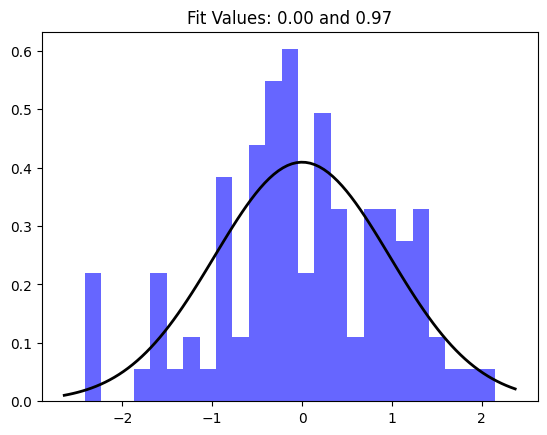

In [88]:
# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = stats.norm.fit(df1) 
 
# Plot the histogram.
plt.hist(df1, bins=25, density=True, alpha=0.6, color='b')
 
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
 
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
 
plt.show()

In [91]:
min_z = df1.min()
max_z = df1.max()

# Function to scale z-score to 100-point scale
def scale_z_to_100(z, min_z, max_z):
    return ((z - min_z) / (max_z - min_z)) * 100

# Scale all z-scores
scaled_values = scale_z_to_100(df1, min_z, max_z)

In [99]:
scaled_values.sort_values()

48      0.000000
87      0.697375
41      2.715765
66      2.909659
73     14.494137
         ...    
45     84.956550
49     87.610172
65     91.772007
3      92.813989
24    100.000000
Name: A, Length: 100, dtype: float64

In [93]:
df1

0    -0.427758
1     0.937765
2    -0.121224
3     1.816161
4    -0.118433
        ...   
95   -0.170528
96   -0.353696
97    0.444757
98   -0.562109
99   -0.552382
Name: A, Length: 100, dtype: float64

In [101]:
wingerschema = schemas.att_winger_schema()
columnmapping= schemas.column_mapping()

In [102]:
for category, details in wingerschema.items():
    for metric in details['measurements'].keys():
        metric = metric.replace()


{'Crossing': {'weight': 0.05,
  'measurements': {'Crosses per 90': 0.6, 'Accurate crosses, %': 0.4}},
 'Dribbles': {'weight': 0.2,
  'measurements': {'Dribbles per 90': 0.65, 'Successful dribbles, %': 0.35}},
 'Ball Progression': {'weight': 0.15,
  'measurements': {'Progressive runs per 90': 0.35,
   'Accelerations per 90': 0.2,
   'Progressive passes per 90': 0.3,
   'Accurate progressive passes, %': 0.15}},
 'Shooting': {'weight': 0.25,
  'measurements': {'Shots per 90': 0.25,
   'Shots on target, %': 0.4,
   'Goal conversion, %': 0.35}},
 'Defending': {'weight': 0.1,
  'measurements': {'pAdj Tkl+Int per 90': 0.25,
   'Defensive duels per 90': 0.45,
   'Defensive duels won, %': 0.3}},
 'Passing': {'weight': 0.1,
  'measurements': {'Accurate passes, %': 0.25,
   'Accurate long passes, %': 0.05,
   'Accurate smart passes, %': 0.1,
   'Key passes per 90': 0.25,
   'xA per 90': 0.15,
   'Deep completions per 90': 0.2}},
 'Penalty Area Entries': {'weight': 0.15,
  'measurements': {'Passes